# 추가분석 : Mobile 고객 이탈 분석

* 여러분은 OO 통신화사 데이터분석가 입니다.
* 회사는 약정기간이 끝난 고객이 번호이동(이탈)해 가는 문제를 해결하고자 합니다.
* 그래서 여러분에게, 어떤 고객이 번호이동(이탈)해 가는지 데이터분석을 의뢰하였습니다.
* 고객 이탈여부(CHURN)에 영향을 주는 요인을 찾아 봅시다.

![](https://d18lkz4dllo6v2.cloudfront.net/cumulus_uploads/entry/23964/mobile%20phones.png)

## 0.환경설정

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

### 2) 데이터 로딩

In [2]:
# mobile data
data_path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_NA2.csv"
mobile = pd.read_csv(data_path)
mobile.drop(['id', 'REPORTED_USAGE_LEVEL','OVER_15MINS_CALLS_PER_MONTH'], axis = 1, inplace = True)
mobile.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,5,unsat,considering,0
1,0,74132,191,43,535092.0,349,2,unsat,no,1
2,1,150419,0,14,204004.0,682,6,unsat,considering,0
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0
4,1,23392,0,0,216707.0,233,15,unsat,no,1


|변수 명|내용|구분|
|	----	|	----	|	----	|
|	COLLEGE	|	대학졸업 여부(1,0) - 범주	|		|
|	INCOME	|	연 수입액(달러)	|		|
|	OVERAGE	|	월 초과사용 시간(분)	|		|
|	LEFTOVER	|	월 사용 잔여시간비율(%)	|		|
|	HOUSE	|	집 가격(달러)	|		|
|	HANDSET_PRICE	|	핸드폰 가격(달러)	|		|
|	AVERAGE_CALL_DURATION	|	평균 통화시간(분)	|		|
|	REPORTED_SATISFACTION	|	만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' ) - 범주	|		|
|	CONSIDERING_CHANGE_OF_PLAN	|	변경 계획 설문('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it') - 범주	|		|
|	**CHURN**	|	이탈여부(1 : 이탈, 0 : 잔류)	|	**Target**	|


In [3]:
mobile.isna().sum()

COLLEGE                         0
INCOME                          0
OVERAGE                         0
LEFTOVER                        0
HOUSE                         215
HANDSET_PRICE                   0
AVERAGE_CALL_DURATION           0
REPORTED_SATISFACTION          38
CONSIDERING_CHANGE_OF_PLAN      0
CHURN                           0
dtype: int64

----

## 1.이변량 분석
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [4]:
target = 'CHURN'

### (1) 범주형 Feature --> CHURN
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다.

In [5]:
# 전체 이탈율
total_mean = mobile[target].mean()
print(total_mean)

0.49272222222222223


#### 1) COLLEGE --> CHURN

In [9]:
var = "COLLEGE"

① 교차표(pd.crosstab())

In [10]:
pd.crosstab(mobile[target], mobile[var])

COLLEGE,0,1
CHURN,,
0,4616,4515
1,4335,4534


② 시각화( Stacked Bar, Mosaic)

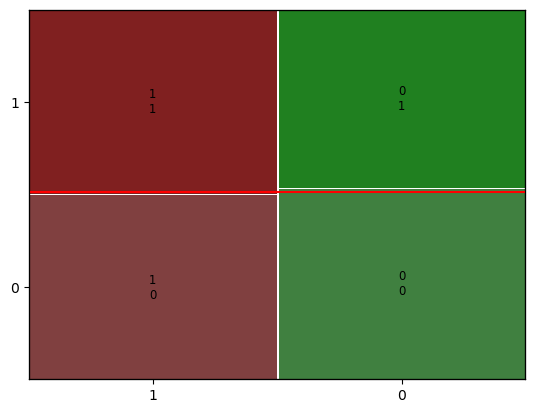

In [11]:
mosaic(mobile, [var,target], gap=0.003)
plt.axhline(1- mobile[target].mean(), color = 'r')
plt.show()

In [ ]:
# 두 그룹별로 이탈 비율이 유의미하지 않아보인다.

③ 가설검정(카이제곱검정)

In [12]:
# 1) 먼저 교차표 집계
table = pd.crosstab(mobile[target], mobile[var])
print(table)
print('-' * 50)

# 2) 카이제곱검정
spst.chi2_contingency(table)

COLLEGE     0     1
CHURN              
0        4616  4515
1        4335  4534
--------------------------------------------------


Chi2ContingencyResult(statistic=4.982102934693503, pvalue=0.025610833478220536, dof=1, expected_freq=array([[4540.64338889, 4590.35661111],
       [4410.35661111, 4458.64338889]]))

In [13]:
# 아주 약한 차이가 있음.

④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

> * 차트를 통해서는 대학졸업여부와 이탈여부는 관련이 없어 보임.
* 그러나 카이제곱검정으로는 pvalue가 0.02로 유의수준 0.05보다 작게 나옴
* 결론 : 약한 관계

#### 2) REPORTED_SATISFACTION  --> CHURN

In [17]:
def chi2_testing(var, target):
    mosaic(mobile, [var,target], gap=0.003)
    plt.axhline(1- mobile[target].mean(), color = 'r')
    plt.show()
    
    print()
    print('-' * 50)    
    # 1) 먼저 교차표 집계
    table = pd.crosstab(mobile[target], mobile[var])
    print(table)
    print('-' * 50)

    # 2) 카이제곱검정
    print(spst.chi2_contingency(table))

In [18]:
var = 'REPORTED_SATISFACTION'

① 교차표(pd.crosstab())

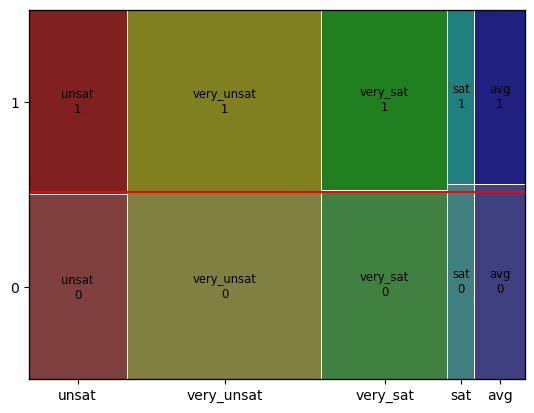


--------------------------------------------------
REPORTED_SATISFACTION  avg  sat  unsat  very_sat  very_unsat
CHURN                                                       
0                      952  492   1792      2334        3543
1                      854  440   1798      2228        3529
--------------------------------------------------
Chi2ContingencyResult(statistic=6.8411009572056445, pvalue=0.14452738878905066, dof=4, expected_freq=array([[ 916.27201871,  472.84912593, 1821.38236277, 2314.5254426 ,
        3587.97104999],
       [ 889.72798129,  459.15087407, 1768.61763723, 2247.4745574 ,
        3484.02895001]]))


In [19]:
chi2_testing(var, target)

② 시각화( Stacked Bar, Mosaic)

③ 가설검정(카이제곱검정)

④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

In [20]:
# 만족도 변수 역시 시각화 결과 관계가 없어 보인다.
# 카이제곱검정 결과 역시 p-value 및 chi2 통계량을 확인하니 관계가 없음이 확실하다.

#### 3) CONSIDERING_CHANGE_OF_PLAN --> CHURN

In [21]:
var = 'CONSIDERING_CHANGE_OF_PLAN'

① 교차표(pd.crosstab())

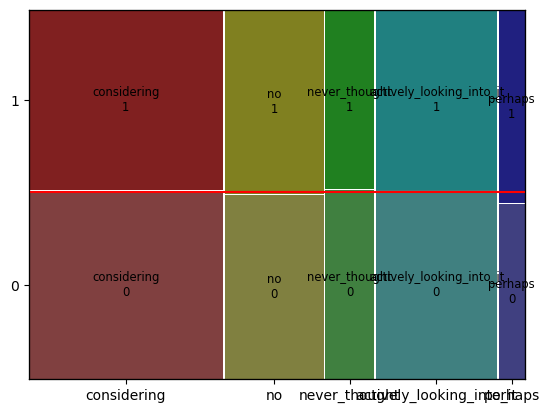


--------------------------------------------------
CONSIDERING_CHANGE_OF_PLAN  actively_looking_into_it  considering  \
CHURN                                                               
0                                               2278         3648   
1                                               2175         3493   

CONSIDERING_CHANGE_OF_PLAN  never_thought    no  perhaps  
CHURN                                                     
0                                     926  1823      456  
1                                     878  1821      502  
--------------------------------------------------
Chi2ContingencyResult(statistic=5.421434419620689, pvalue=0.2467222586679969, dof=4, expected_freq=array([[2258.90794444, 3622.47061111,  915.12911111, 1848.52022222,
         485.97211111],
       [2194.09205556, 3518.52938889,  888.87088889, 1795.47977778,
         472.02788889]]))


In [22]:
chi2_testing(var, target)

② 시각화( Stacked Bar, Mosaic)

시각화를 통해 파악한 내용을 적어 봅시다.

③ 가설검정(카이제곱검정)

④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

In [23]:
# 시각화 결과 관련이 없어보인다.
# 카이제곱검정 결과 p-value 및 카이제곱통계량을 확인하니 유의미 하지 않음.

### (2) 숫자형 Feature --> CHURN

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) INCOME --> CHURN


In [24]:
var = 'INCOME'

① 그래프 : histogram, densityplot

In [28]:
def plot_numeric(var, target):
    plt.figure(figsize = (15, 7))
    ax1 = plt.subplot(1, 3, 1)

    sns.histplot(x = var, data = mobile,
                hue =target, multiple = 'fill', ax = ax1)

    ax1.axhline(mobile[target].mean(), color = 'r')

    ax2 = plt.subplot(1, 3, 2)

    sns.kdeplot(x = var, data = mobile,
                hue =target, multiple = 'fill', ax = ax2)

    ax2.axhline(mobile[target].mean(), color = 'r')

    ax3 = plt.subplot(1, 3, 3)

    sns.kdeplot(x = var, data = mobile,
                hue = target, fill = True, common_norm = False, ax = ax3)

    plt.show()

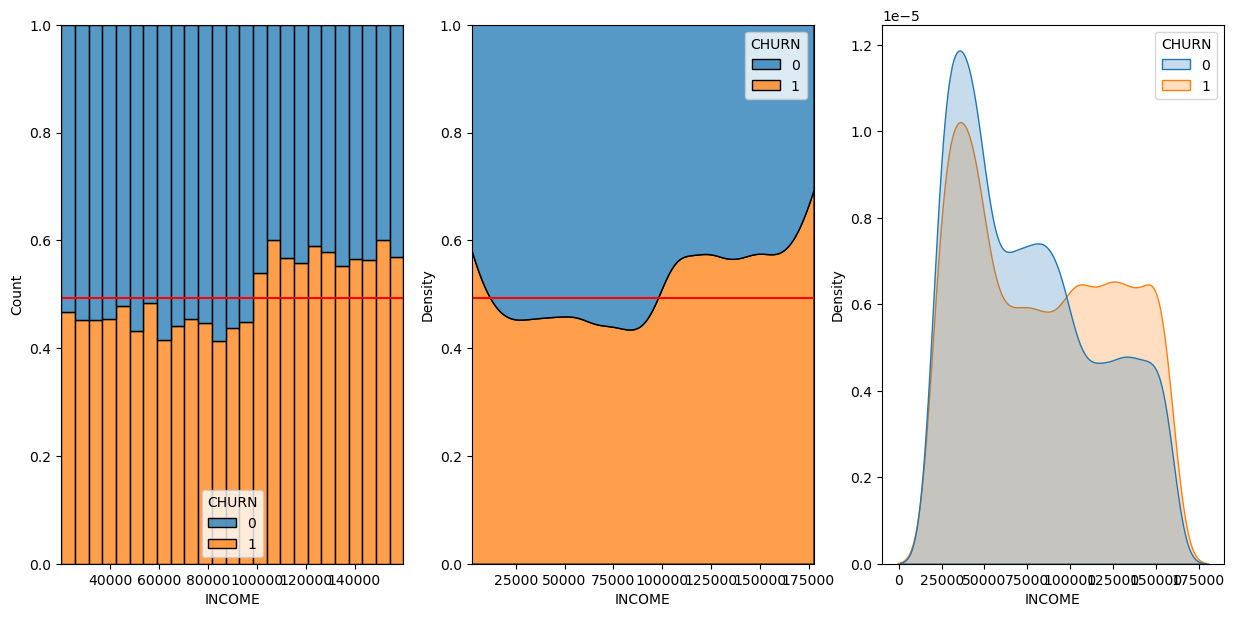

In [29]:
plot_numeric(var, target)

In [ ]:
# 소득이 약 10000 이상인 사람들의 이탈률이 평균 이탈률보다 높음을 알 수 있다.
# 10000 미만인 사람들은 이탈을 잘 하지 않는다.
# 뭔가 통신사 혜택이 적거나 고가의 요금제가 메리트가 없는 것일까?

시각화를 통해 파악한 내용을 적어 봅시다.

② 수치화 : 로지스틱회귀

In [32]:
sm.Logit(mobile[target], mobile[var]).fit().summary()

Optimization terminated successfully.
         Current function value: 0.692683
         Iterations 2


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  CHURN   No. Observations:                18000
Model:                          Logit   Df Residuals:                    17999
Method:                           MLE   Df Model:                            0
Date:                Tue, 17 Sep 2024   Pseudo R-squ.:               0.0005172
Time:                        16:47:03   Log-Likelihood:                -12468.
converged:                       True   LL-Null:                       -12475.
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
INCOME      6.738e-07   1.65e-07      4.087      0.000    3.51e-07    9.97e-07
==============================================================================
"""

③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

In [ ]:
# 설명력이 좋은 변수는 아니다. 또한 변수의 중요도가 약한것 같다.

#### 2) OVERAGE --> CHURN


In [33]:
var = 'OVERAGE'

① 그래프 : histogram, densityplot

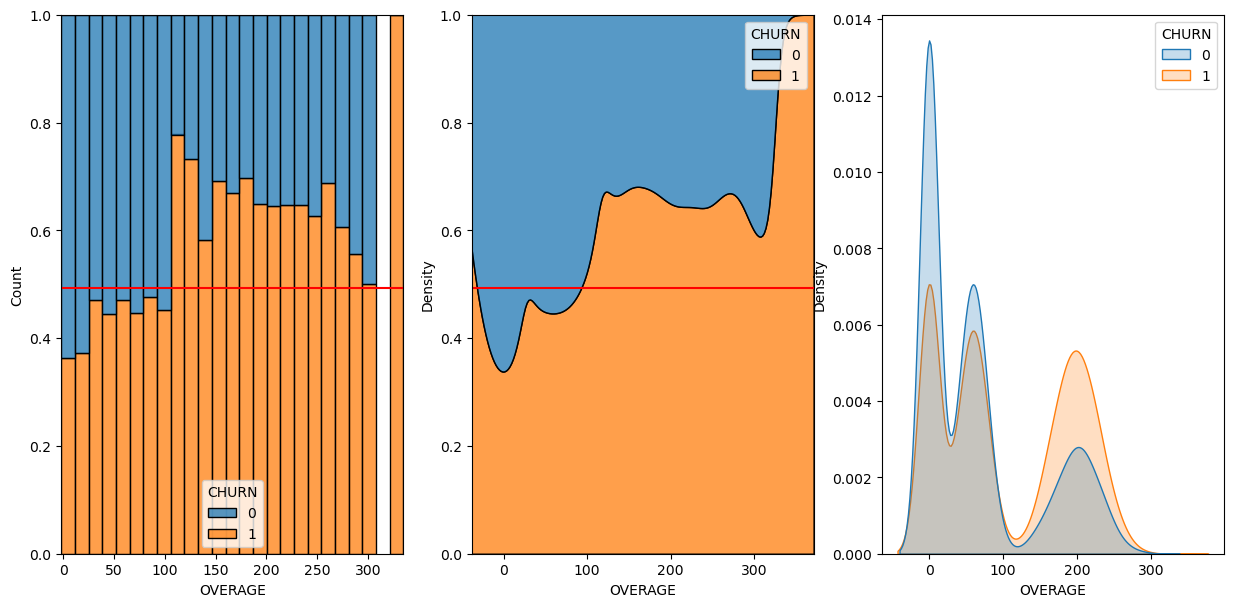

In [34]:
plot_numeric(var, target)

In [39]:
# 초과시간이 multi-modal 형태를 띈다.
# 특정 분포의 중앙값에 해당하는 사용량 초과 결제 상품이 있는 걸까? (ex. 200분 추가 통화량 등)
# 해당 통신사에는 고가의 요금제가 없거나 부족하기 때문에, 초과 사용량이 많은 사람일수록 계속 결제하기 보다 이탈할 확률이 높을 것이다.

시각화를 통해 파악한 내용을 적어 봅시다.

② 수치화 : 로지스틱회귀

In [36]:
sm.Logit(mobile[target], mobile[var]).fit().summary()

Optimization terminated successfully.
         Current function value: 0.680553
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  CHURN   No. Observations:                18000
Model:                          Logit   Df Residuals:                    17999
Method:                           MLE   Df Model:                            0
Date:                Tue, 17 Sep 2024   Pseudo R-squ.:                 0.01802
Time:                        16:50:00   Log-Likelihood:                -12250.
converged:                       True   LL-Null:                       -12475.
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
OVERAGE        0.0027      0.000     20.920      0.000       0.002       0.003
==============================================================================
"""

③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

In [ ]:
# 약한 관계가 있는 것 같다.

#### 3) LEFTOVER --> CHURN


In [37]:
var = 'LEFTOVER'

① 그래프 : histogram, densityplot

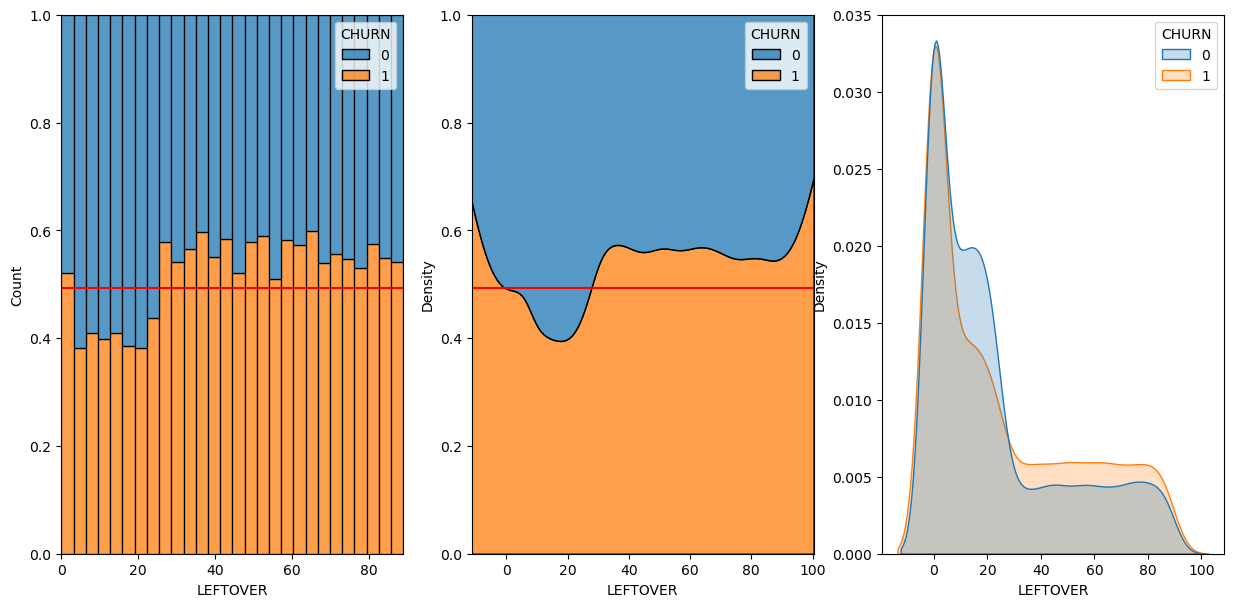

In [38]:
plot_numeric(var, target)

In [40]:
# 잔여 사용시간이 약 30 이하일수록 이탈하지 않는 사람이 많다.
# 그러나 잔여 사용시간이 없는 사람이라면 (초과사용) 이탈하는 사람이 조금 더 많다.
# 잔여시간이 30 이상일수록 이탈하는 사람이 많다.

# 저가형 요금제와 고가형 요금제가 없는 것일까? 

시각화를 통해 파악한 내용을 적어 봅시다.

② 수치화 : 로지스틱회귀

In [41]:
sm.Logit(mobile[target], mobile[var]).fit().summary()

Optimization terminated successfully.
         Current function value: 0.692532
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  CHURN   No. Observations:                18000
Model:                          Logit   Df Residuals:                    17999
Method:                           MLE   Df Model:                            0
Date:                Tue, 17 Sep 2024   Pseudo R-squ.:               0.0007346
Time:                        16:53:25   Log-Likelihood:                -12466.
converged:                       True   LL-Null:                       -12475.
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LEFTOVER       0.0019      0.000      4.700      0.000       0.001       0.003
==============================================================================
"""

③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

#### 4) HOUSE --> CHURN


In [42]:
var = 'HOUSE'

① 그래프 : histogram, densityplot

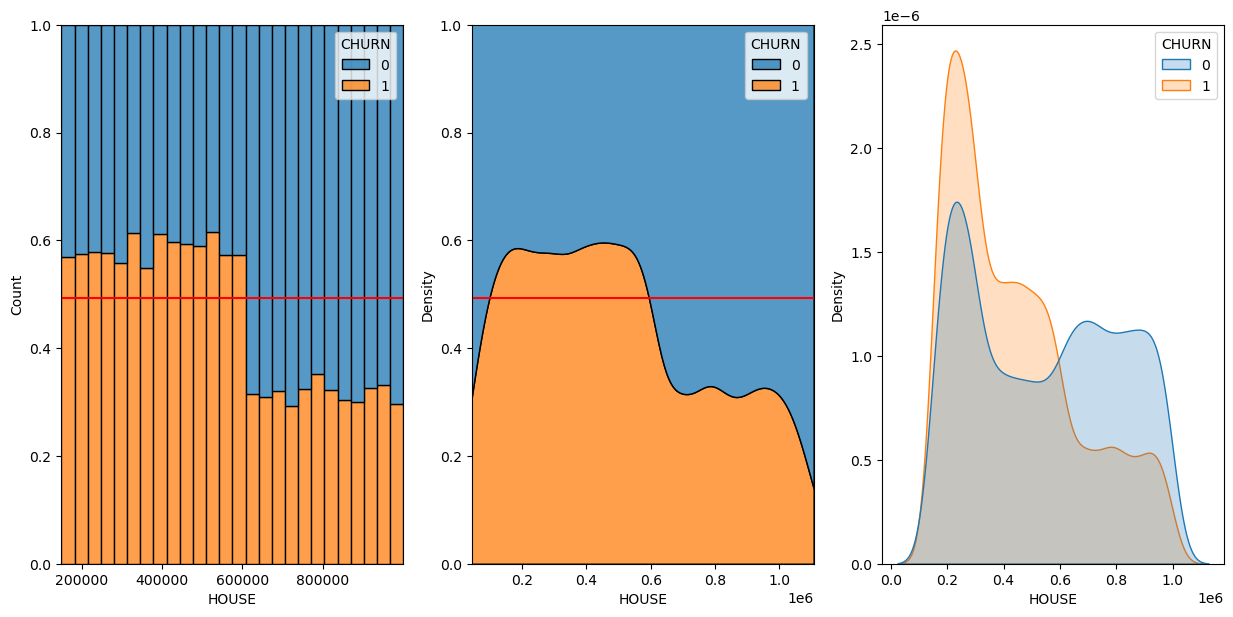

In [43]:
plot_numeric(var, target)

In [ ]:
# 집 가격이 약 6e5 이하인 사람들의 이탈률이 평균 이탈률보다 높다.
# 좋은 집에 사는 사람들이 잘 이탈하지 않는다?

시각화를 통해 파악한 내용을 적어 봅시다.

② 수치화 : 로지스틱회귀

In [45]:
sm.Logit(mobile[target], mobile[var].notnull()).fit().summary()

Optimization terminated successfully.
         Current function value: 0.693055
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  CHURN   No. Observations:                18000
Model:                          Logit   Df Residuals:                    17999
Method:                           MLE   Df Model:                            0
Date:                Tue, 17 Sep 2024   Pseudo R-squ.:              -1.978e-05
Time:                        16:55:31   Log-Likelihood:                -12475.
converged:                       True   LL-Null:                       -12475.
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
HOUSE         -0.0273      0.015     -1.822      0.068      -0.057       0.002
==============================================================================
"""

③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

#### 5) HANDSET_PRICE --> CHURN


In [46]:
var = "HANDSET_PRICE"

① 그래프 : histogram, densityplot

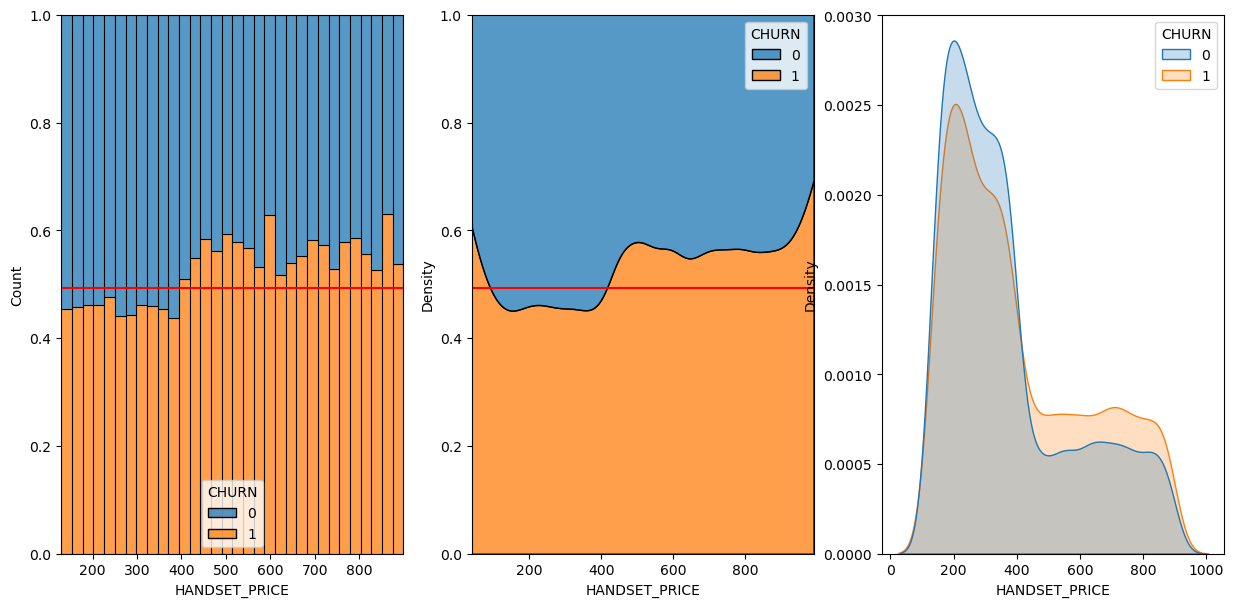

In [47]:
plot_numeric(var, target)

In [48]:
# 휴대폰 가격이 약 400 이상인 사람들이 주로 이탈하는 것처럼 보인다.

시각화를 통해 파악한 내용을 적어 봅시다.

② 수치화 : 로지스틱회귀

In [49]:
sm.Logit(mobile[target], mobile[var]).fit().summary()

Optimization terminated successfully.
         Current function value: 0.692730
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  CHURN   No. Observations:                18000
Model:                          Logit   Df Residuals:                    17999
Method:                           MLE   Df Model:                            0
Date:                Tue, 17 Sep 2024   Pseudo R-squ.:               0.0004492
Time:                        16:56:56   Log-Likelihood:                -12469.
converged:                       True   LL-Null:                       -12475.
Covariance Type:            nonrobust   LLR p-value:                       nan
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
HANDSET_PRICE     0.0001   3.35e-05      3.874      0.000    6.42e-05       0.000
=================================================================================
"""

③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

#### 6) AVERAGE_CALL_DURATION --> CHURN


In [50]:
var = 'AVERAGE_CALL_DURATION'

① 그래프 : histogram, densityplot

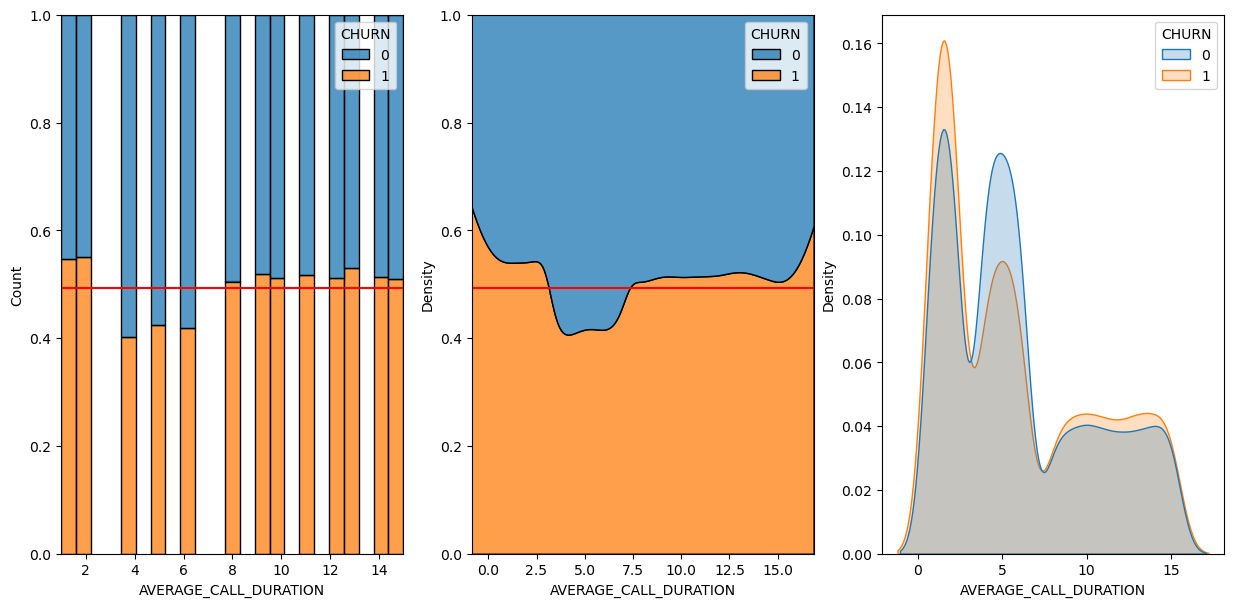

In [51]:
plot_numeric(var, target)

In [ ]:
# multi modal 형태를 띄는 것처럼 보인다.
# 평균 통화시간이 2 이하인 사람들이 이탈률이 높고, 4 ~ 6 사이인 사람들이 이탈률이 낮고, 다시 8 ~ 15 사이인 사람들이 이탈률이 높다.
# 통화시간이 중간정도 (4 ~ 6)라면 이탈률이 낮다.

시각화를 통해 파악한 내용을 적어 봅시다.

② 수치화 : 로지스틱회귀

In [52]:
sm.Logit(mobile[target], mobile[var]).fit().summary()

Optimization terminated successfully.
         Current function value: 0.693027
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  CHURN   No. Observations:                18000
Model:                          Logit   Df Residuals:                    17999
Method:                           MLE   Df Model:                            0
Date:                Tue, 17 Sep 2024   Pseudo R-squ.:               2.005e-05
Time:                        16:58:28   Log-Likelihood:                -12474.
converged:                       True   LL-Null:                       -12475.
Covariance Type:            nonrobust   LLR p-value:                       nan
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
AVERAGE_CALL_DURATION    -0.0042      0.002     -2.077      0.038      -0.008      -0.000
=========================================================================================
"""

③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

## 2.관계 정리

### 1) 강한관계의 변수

### 2) 약한관계의 변수

In [ ]:
# overage, house, income, leftover, handset_price, average_call_duration

### 3) 관계 없음

### 4) 추가 분석

In [ ]:
# 사내의 요금제 종류를 알아볼 필요가 있다.